In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras import Input
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
# Step 2: Load Dataset (MNIST is built-in with Keras)
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [3]:
# Step 3: Preprocess Data
# Normalize pixel values (0-255 → 0-1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [4]:
# Reshape to include channel dimension (28,28 → 28,28,1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [5]:
model = Sequential([
    Input(shape=(28,28,1)),              # Input layer
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [6]:
# Step 5: Compile Model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [7]:
# Step 6: Train Model
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9509 - loss: 0.1632 - val_accuracy: 0.9823 - val_loss: 0.0623
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.9834 - loss: 0.0534 - val_accuracy: 0.9832 - val_loss: 0.0574
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 38s 15ms/step - accuracy: 0.9897 - loss: 0.0328 - val_accuracy: 0.9858 - val_loss: 0.0527
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.9928 - loss: 0.0214 - val_accuracy: 0.9885 - val_loss: 0.0466
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - accuracy: 0.9952 - loss: 0.0148 - val_accuracy: 0.9882 - val_loss: 0.0452


In [8]:
# Step 7: Evaluate Model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nTest Accuracy:", test_acc)

313/313 - 1s - 4ms/step - accuracy: 0.9852 - loss: 0.0457

Test Accuracy: 0.9851999878883362


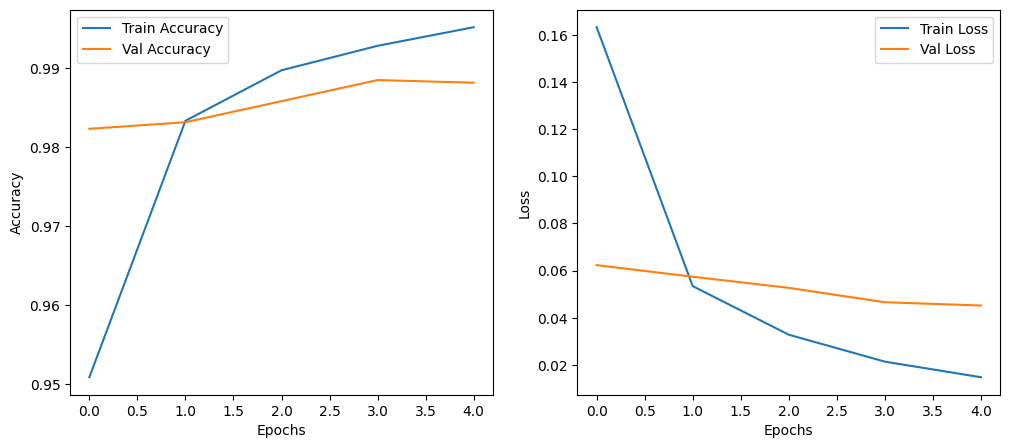

In [9]:
# Step 8: Plot Accuracy & Loss
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [10]:
# Step 9: Predict Example Digits
predictions = model.predict(x_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


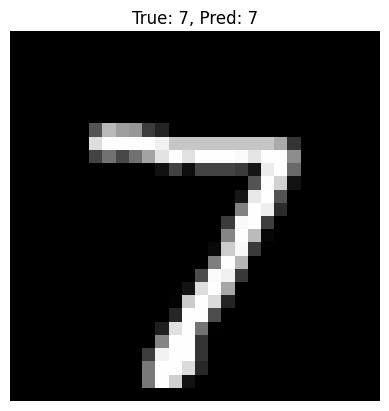

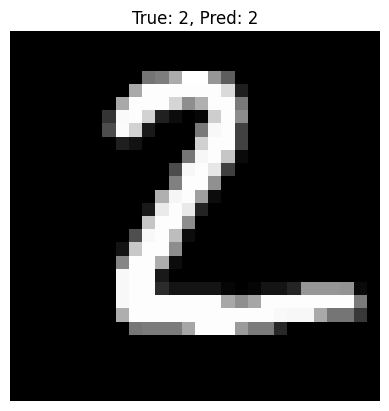

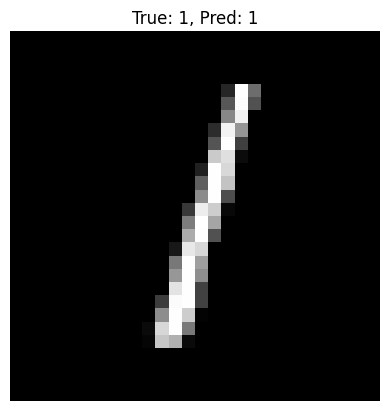

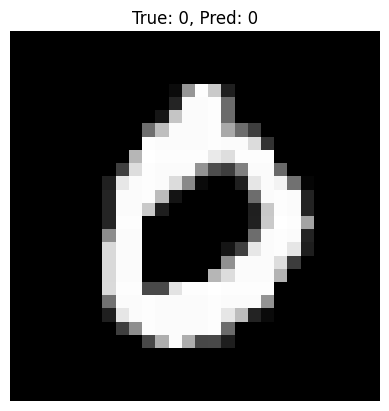

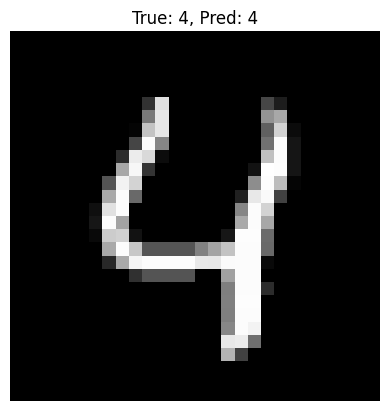

In [11]:
for i in range(5):
    plt.imshow(x_test[i].reshape(28,28), cmap="gray")
    plt.title(f"True: {y_test[i]}, Pred: {np.argmax(predictions[i])}")
    plt.axis("off")
    plt.show()